<a href="https://colab.research.google.com/github/robertdshaw/robertdshaw/blob/main/News_Industry_Site_Conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

For E-News, determine the effectiveness of their new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

To answer these 4 questions, our Data Science team conducted an A/B test by randomly selecting 100 users and dividing them equally into two groups as follows: 

1. n of population = 100
2. n of control group = 50 (served w/ existing landing page)
3. n of treatement group = 50 (served w/ new landing page)
4. Alpha = 0.5 


## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
!pip install --upgrade scipy
scipy.__version__

'1.7.3'

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_2/abtest.csv')
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# We look at the head of the dataset 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# We look at the tail of the dataset 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The dataset contains the A/B test, including time spent on new and existing landing pages and if they were converted or not as well as their language preferences.

In [ ]:
# We check the shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 100 rows and 6 columns.


In [ ]:
#We check the statistics in the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
#Check for duplications
data.duplicated().sum()

0

In [ ]:
#Check unique values in languages preferred column
df['language_preferred'].nunique()

3

There are no missing values and no duplicates in the data. The average time spent on the landing pages is a little over 5 minutes with some significant outliers giving a large range of close to zero minimum and over 10 maximum. The data contains primarily categorical variables and beyond binomial choices of yes/no and old/new, the only other key value is that there are 3 language preferences. 

### Univariate Analysis

In [ ]:
#Check basic info in the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 100 entries in the population sample with one 64-byte integer and one 64-byte float. All the other 4 columns are categorical variables. 

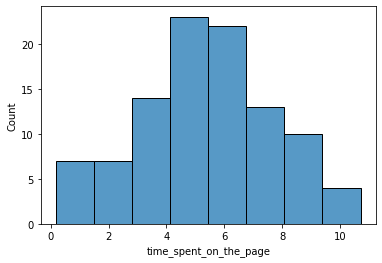

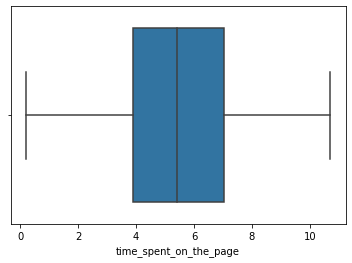

In [ ]:
#We check the distribution for numerical columns
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

The distribution is very close to normal. Looking at the sole relevant numerical column of time spent on the pages, we see that 50% of users spent between 4 and 7 minutes on the landing pages. 

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

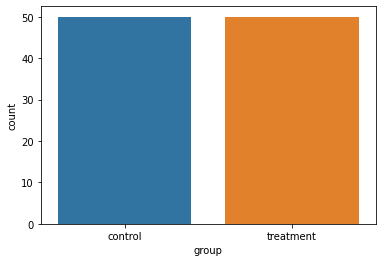

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

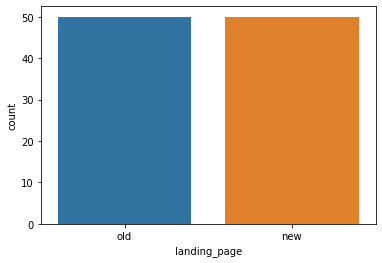

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()

The control and treament groups as well as the landing page counts are evenly distributed across the population sample.

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

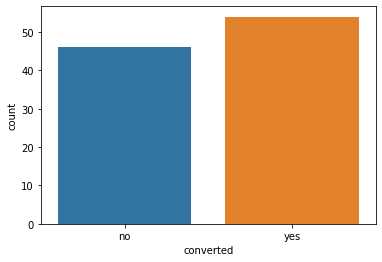

In [ ]:
sns.countplot(data=df,x='converted')
plt.show()

54% of the users get converted into subscribers, while the remainder do not. 

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

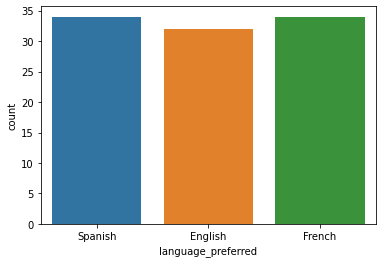

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.show()

There is little difference between the preferred languages chosen to view the landing page. Spanish and French are the same, while English is only fractionally less. 

### Bivariate Analysis

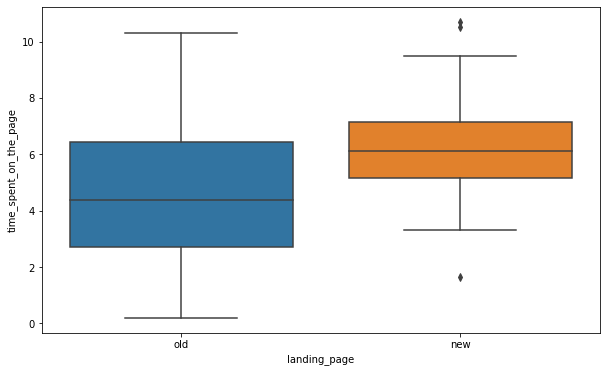

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

75% of the time spent on the old landing page is under 6.5 minutes, while 50% of the time spent on the new landing page is over 6 minutes. There are some outliers for time spent on the new landing page with some only viewing it for close to 1 minute and others viewing it for over 3 minutes. 

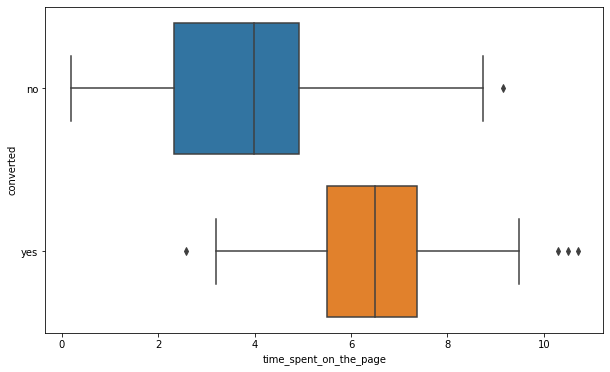

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='time_spent_on_the_page', y='converted')
plt.show()

Users who spend more time on the landing page tend to subscribe, with 75% of them who spent at least 5.5 minutes on the page converting to subscribers.

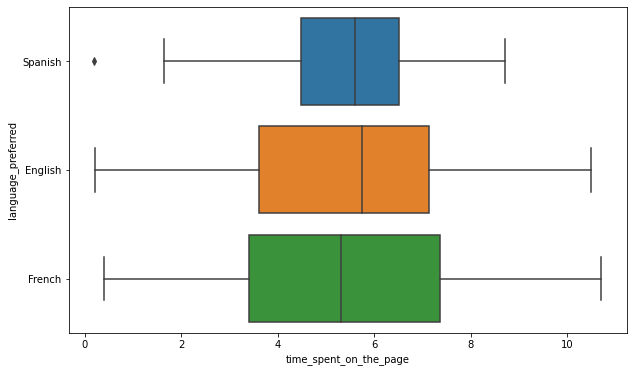

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='time_spent_on_the_page',y='language_preferred')
plt.show()

Time spent on the landing page does not appear to be impacted by the language chosen to view the page. The median English-language user tends to spend fractionally more time on the page than his/her Spanish and French counterparts but only by 10-20 seconds.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

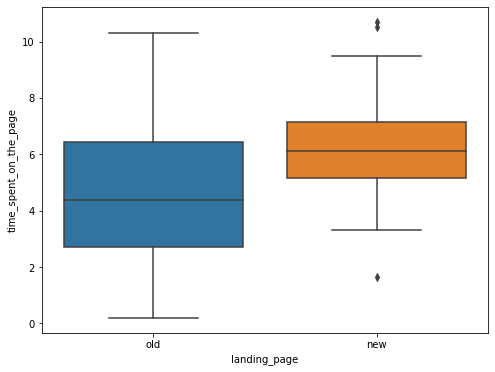

In [ ]:
# Here we present visual analysis of the time spent on the new page against the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

Users appear to spend more time - roughly 45 seconds longer - on the new landing page in comparison to the old one. 

### Step 1: Define the null and alternate hypotheses

####We will test the null hypothesis

𝐻0:𝜇1=𝜇2

####against the alternate hypothesis

𝐻𝑎:𝜇1>𝜇2

where 𝜇1=time spent on the new landing page and 𝜇2 = time spent on the old landing page.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we will select the t-test for equality of means.We need to test whether the T-test assumptions are satisfied or not.

### Step 3: Decide the significance level

As given in the problem statement, we select 𝛼=0.05.

### Step 4: Collect and prepare data + Check Test Assumptions 

In [ ]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Assumptions check**
1. Continuous data - Yes, time spent is measured on a continuous scale.
2. Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
3. Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
4. Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
5. Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

So, we can use two sample T-test for this problem.

### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# calculate the test statistic and p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

We have enough evidence to support the claim that the time spent by users on the new landing page is greater and is likely due to the design team's work improving the site's outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Perform Visual Analysis

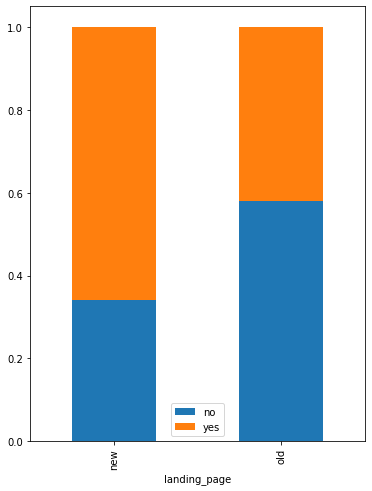

In [ ]:
# Here we visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

The conversion rate appears to be higher for the new landing page, with over 60% of users becoming subscribers to E-News' website.

###Step 1: Define the Null and Alternate Hypothesis

####We will test the null hypothesis
𝐻0:𝜇1=𝜇2

####against the alternate hypothesis
𝐻𝑎:𝜇1>𝜇2

where 𝜇1 is equal to the new page conversion rate and 𝜇2 refers to the old page conversion rate.

###Step 2: Select Appropriate Test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. We will collect/prepare the data and check assumptions for the one proportion z-test.

###Step 3: Decide the Significance Level

As given in the problem statement, we select 𝛼=0.05.

###Step 4: Collect and Prepare Data + Check Test Assumptions

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] 
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


**Assumptions check:**
1. Binomally distributed population - Yes, the conversion rate is either greater for the new page or not.
2. Random sampling from the population - Yes, we are told that this is a random sample.
3. Can the binomial distribution approximated to normal distribution - Yes. 
4. We check if np and n(1-p) are greater than or equal to 10 - 
*   𝑛𝑝=100*(35/100)=35≥10
*   𝑛(1−𝑝)=100*(100−35/100)= 65≥10

Based on this information, we select the one proportion z-test.

###Step 5: Calculate the P-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest   

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


###Step 7: Draw Inference

We have enough evidence to support the claim that the conversion rate for the new landing page is greater than the old landing page. Again, this is likely due to the design team's work improving the site's outline & recommended content to convert customers into subscribers.

## 3. Are conversion and preferred language independent or related?

###Perform Visual Analysis 

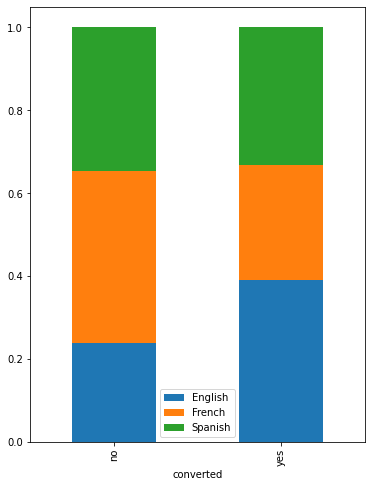

In [ ]:
# Here we present visual anaylsis of whether or not a user gets converted into a subscriber linked to the language selected by the user
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

The analysis indicates a slight preference for English as a language choice by users, with close to 40% of converted users opting for this selection. That said, we need to carry out a hypothesis test to explore if there are significantly inter-related or not.

###Step 1: Define the Null and Alternate Hypothesis



We will test the null hypothesis

𝐻0:𝜇1=𝜇2, where conversion and preferred language are related

against the alternate hypothesis

𝐻𝑎:𝜇1≠𝜇2, where conversion and preferred language are not related

###Step 2: Select Appropriate Test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. For this reason, we will collect/prepare the data and check assumptions for the Chi squared test of independence. 

###Step 3: Decide the Significance Level

As given in the problem statement, we select 𝛼=0.05.

###Step 4: Collect and Prepare Data + Check Test Assumptions

In [ ]:
# Here we create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


As shown by the visual analysis, the contingency table shows a prefence for English language but we still need to check if this is true.

**Assumptions check:**
1.   Categorical variables - Yes
2.   Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.0
3. Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Based on this information, we select the Chi squared test of independence.

###Step 5: Calculate the P-value


In [ ]:
# complete the code to import the required function
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi2, p_value, dof, expected = chi2_contingency (contingency_table)   
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw Inference

We do not have enough evidence to support the claim that whether the user gets converted to a subscriber of the news portal or not is connected to their language preference.

By failing to reject the null hypothesis, we can conclude that the preferred language is independent from the conversions. This comes in spite of an apparent preference for English users converting as subscribers. This means that there must be another reason why English language users subscribe more.

## 4. Is the time spent on the new page the same for the different language users?

###Perform Visual Analysis

In [ ]:
# Creating a new DataFrame for users who interacted with the new page
df_new = df[df['landing_page'] == 'new']

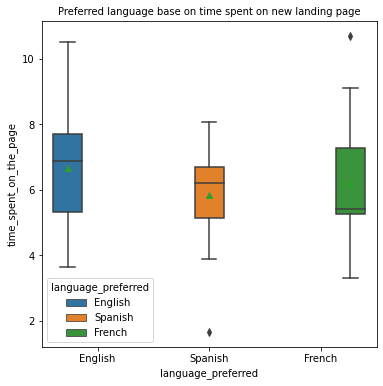

In [ ]:
# Drawing the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , showmeans = True, data = df_new, hue = 'language_preferred')
a.set_title("Preferred language base on time spent on new landing page", fontsize=10)
plt.show()

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

This visual analysis appears to show that the time spent on the new page is greatest for English - spending on average close to 7 minutes - and lowest for Spanish - spending on average 6 minutes. French language time spent shows the mean is greater than the median, meaning the distribution is positively skewed with outliers in the higher end.

###Step 1: Define the Null and Alternate Hypothesis

Let 𝜇1,𝜇2,𝜇3  be the means of the time spent on the new landing pages for each of the three language preferences, i.e. English French and Spanish respectively. 

We will test the null hypothesis

𝐻0:𝜇1=𝜇2=𝜇3, where the time spent on the new page is the same for different language users. 

against the alternate hypothesis

𝐻𝑎: where at least one language user spends a different amount of time than the rest.

###Step 2: Select Appropriate Test
Given there are more than 2 variables, we will collect/prepare the data and check assumptions for the one-way ANOVA test.

###Step 3: Decide the Significance Level

As given in the problem statement, we select 𝛼=0.05.

###Step 4: Check Test Assumptions

We will choose the **one-way ANOVA test** and first check the following assumptions for that test:

1. Check normality of the distribution based on the **Shapiro-Wilk’s test**. We will test the null hypothesis against the alternative hypothesis.

𝐻0:  Time spent on the new page follows a normal distribution 

𝐻𝑎:  Time spent on the new page does not follow a normal distribution

2. Check variance equality based on the **Levene test**. 

𝐻0:  All the variations are equal. 

𝐻𝑎:  At least one variation differs from the rest.

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis, so the time spent on the page by different language users follows a normal distribution.


In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis of homogeneity of variances.

**Assumptions check:**

1. The populations are normally distributed - Yes, the normality 
assumption is verified using the Shapiro-Wilk’s test.
2. Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.
3. Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.

Thus, we can use the one-way ANOVA test.

###Step 5: Calculate the P-value

In [ ]:
# complete the code to import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred']=='English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred']=='French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred']=='Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw Inference

We do not have enough statistical evidence to conclude that at least one language user's time spent on the page is different from the rest at 5% significance level.


## Conclusion and Business Recommendations

* Overall, we have enough evidence to support the claim that both the 
time spent by users on the new landing page as well as the conversion rate are greater than for the old landing page. This is likely due to the design team's work improving the site's outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

1. From the sample data, it was observed that users spend more time - roughly 45 seconds longer - on the new landing page in comparison to the old one.
2. The conversion rate appears to be higher for the new landing page, with over 60% of users becoming subscribers to E-News' website
3. Both time spent on the new page and conversions do not appear to be linked to language selections. There was enough statistical evidence to say that the English language users convert best but further statistical analysis needs to be done to determine why this is.

* We recommend that the new landing page should be approved, and futher website development is carried out around recommended content to increase conversions. Statistical analysis around different content personalisation tools should be carried out to test for the connection between types of content and subscriptions.

___